In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 #Tarea 6 - Jose Carrillo
 ## Imports

In [55]:
import os
import pandas as pd
import numpy as np
import scipy
from   math import pi
import matplotlib.pyplot as plt
from   sklearn.datasets import make_blobs
from   sklearn.decomposition import PCA
from   sklearn.datasets import make_blobs
from   sklearn.cluster import KMeans


# Import the dendrogram function and the ward, single, complete, average, linkage and fcluster clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward, single, complete,average,linkage, fcluster
from scipy.spatial.distance import pdist

os.getcwd()
os.chdir(r'c:\\Users\\jmc\\Documents\\Ciencia de datos con Python\\ciencia-de-datos\\Unidad N. 6')
#os.chdir(r'c:\\Users\\jocarr3\\Documents\\projects\\ciencia de datos python\\Unidad N. 6')


 ** Funciones

In [56]:
def centroide(num_cluster, datos, clusters):
  ind = clusters == num_cluster
  return(pd.DataFrame(datos[ind].mean()).T)

def bar_plot(centros, labels, cluster = None, var = None):
    from seaborn import color_palette
    colores = color_palette()
    def inside_plot(valores, labels, titulo):
        plt.barh(range(len(valores)), valores, 1/1.5, color = colores)
        plt.title(titulo, color='k')
    if var is not None:
        centros = np.array([n[[x in var for x in labels]] for n in centros])
        colores = [colores[x % len(colores)] for x, i in enumerate(labels) if i in var]
        labels = labels[[x in var for x in labels]]
    if cluster is None:
        for i in range(centros.shape[0]):
            plt.subplot(1, centros.shape[0], i + 1)
            inside_plot(centros[i].tolist(), labels, ('Cluster ' + str(i)))
            plt.yticks(range(len(labels)), labels) if i == 0 else plt.yticks([]) 
    else:
        pos = 1
        for i in cluster:
            plt.subplot(1, len(cluster), pos)
            inside_plot(centros[i].tolist(), labels, ('Cluster ' + str(i)))
            plt.yticks(range(len(labels)), labels) if pos == 1 else plt.yticks([]) 
            pos += 1

def radar_plot(centros, labels):
    from math import pi
    centros = np.array([((n - min(n)) / (max(n) - min(n)) * 100) if 
                        max(n) != min(n) else (n/n * 50) for n in centros.T])
    angulos = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
    angulos += angulos[:1]
    ax = plt.subplot(111, polar = True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angulos[:-1], labels)
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
           ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"], 
           color = "grey", size = 8)
    plt.ylim(-10, 100)
    for i in range(centros.shape[1]):
        valores = centros[:, i].tolist()
        valores += valores[:1]
        ax.plot(angulos, valores, linewidth = 1, linestyle = 'solid', 
                label = 'Cluster ' + str(i))
        ax.fill(angulos, valores, alpha = 0.3)
    plt.legend(loc='upper right', bbox_to_anchor = (0.1, 0.1))


 ## Ejercicio 1
 ** a) Cargar tabla

In [57]:
Importaciones = pd.read_csv('datosTarea\\ImportacionesMexico.csv', delimiter=';', decimal=',', index_col=0)
print(Importaciones)

      Costa Rica  El Salvador  Guatemala  Honduras  Nicaragua  Panama
1979        44.4         27.2       45.6      20.0        6.0    14.1
1980        75.5         11.8       58.9      22.6       17.8    14.4
1981       110.7         50.6      128.3      17.2      119.4   118.5
1982        80.3         70.6      102.2      15.2      154.9   146.1
1983        81.6         82.3       89.0      35.1      169.4   127.1
1984        76.4         97.4      185.0      51.0       75.5   129.0
1985        32.0         89.5      195.3      31.1       33.4   110.2
1986        55.5         63.1       66.3      24.4        9.7    66.7
1987        74.3         72.6       76.3      28.1       11.2   110.7
1988        84.5         76.2       80.1      29.5       11.8   110.2


 ** b) Ejecute un Clustering Jerarquico con la agregaci´on del Salto M´aximo, Salto M´ınimo,
 Promedio y Ward. Grafique el dendograma con cortes para dos y tres cl´usteres.

In [58]:
ward_res = ward(Importaciones)         #Ward
single_res = single(Importaciones)     #Salto mínimo
complete_res = complete(Importaciones) #Salto Máximo
average_res = average(Importaciones)   #Promedio

 ** Agregacion promedio

Text(0, 0.5, 'Distancia o Agregación')

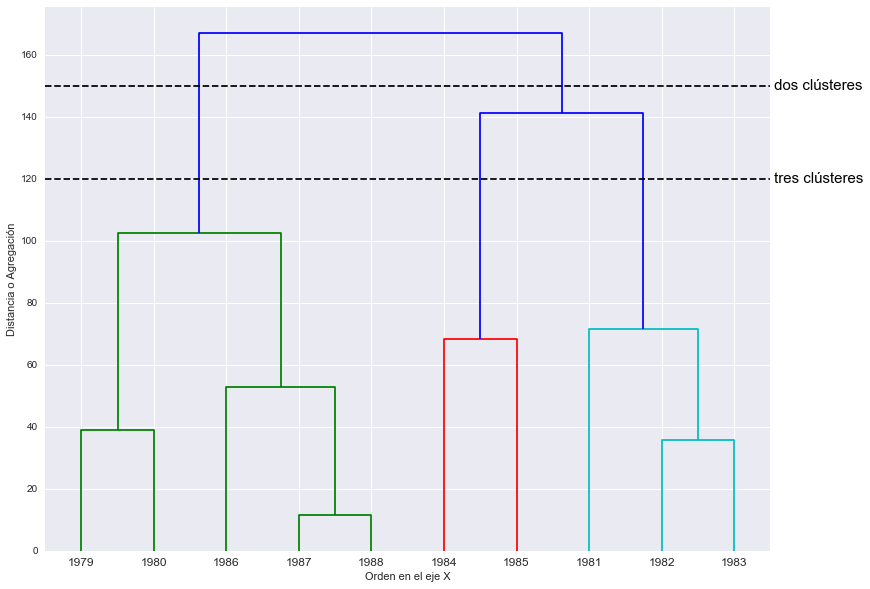

In [59]:
plt.style.use('seaborn')
plt.figure(figsize=(13,10))

dendrogram(average_res,labels= Importaciones.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [150, 150], '--', c='k')
ax.plot(limites, [120, 120], '--', c='k')
ax.text(limites[1], 150, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 120, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")

 ** Agregacion salto minimo

Text(0, 0.5, 'Distancia o Agregación')

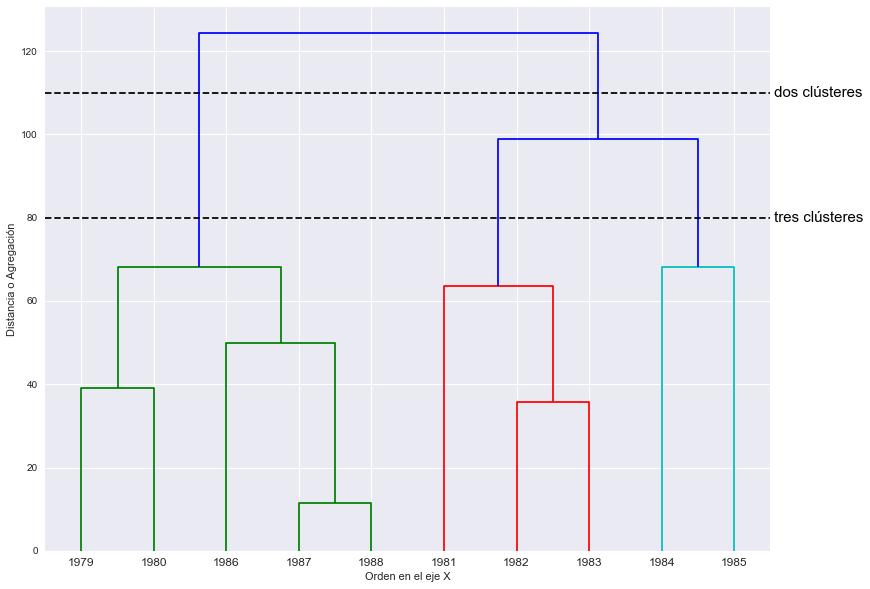

In [60]:
plt.figure(figsize=(13,10))
dendrogram(single_res,labels= Importaciones.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [110, 110], '--', c='k')
ax.plot(limites, [80, 80], '--', c='k')
ax.text(limites[1], 110, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 80, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")

 ** Agregacion salto maximo

Text(0, 0.5, 'Distancia o Agregación')

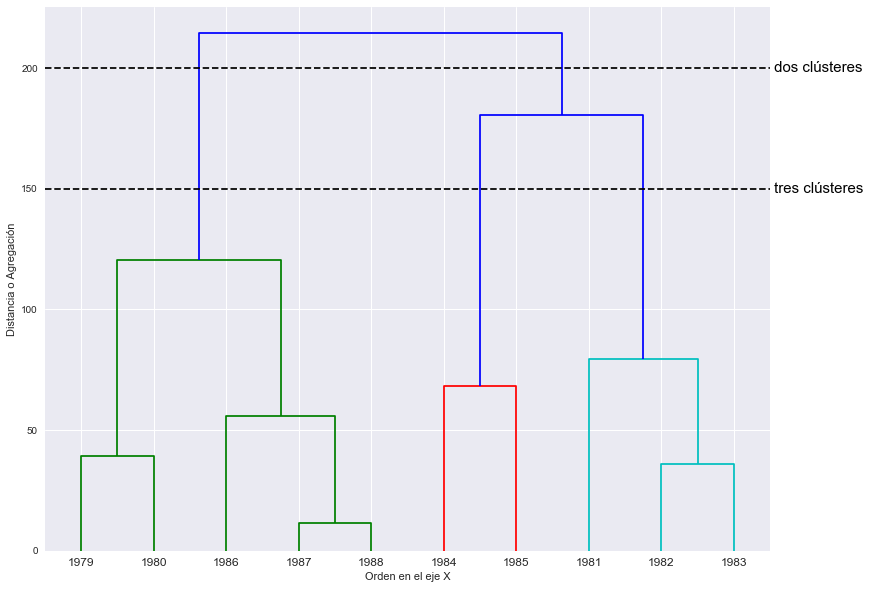

In [61]:
plt.figure(figsize=(13,10))
dendrogram(complete_res,labels= Importaciones.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [200, 200], '--', c='k')
ax.plot(limites, [150, 150], '--', c='k')
ax.text(limites[1], 200, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 150, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")

 ** Agregacion Ward

Text(0, 0.5, 'Distancia o Agregación')

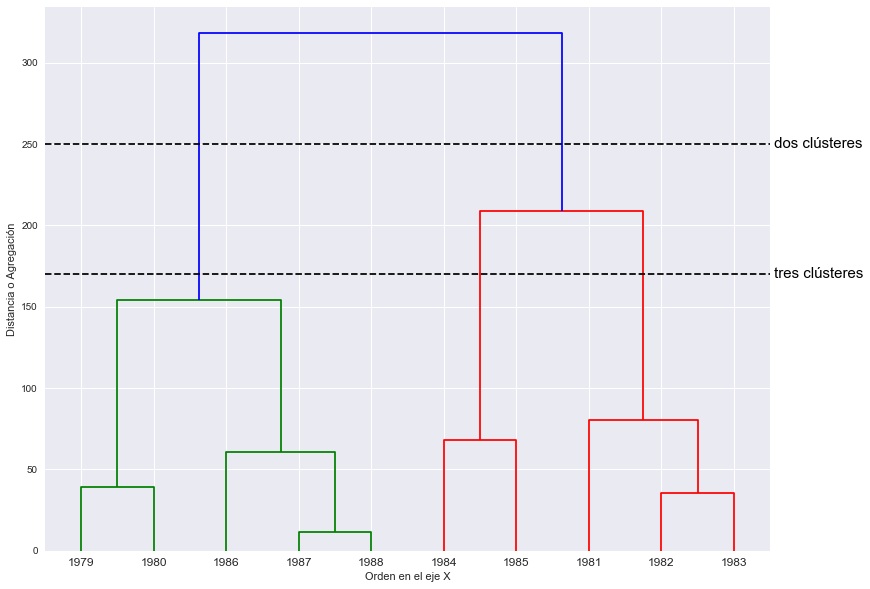

In [62]:
plt.figure(figsize=(13,10))
dendrogram(ward_res,labels= Importaciones.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [250, 250], '--', c='k')
ax.plot(limites, [170, 170], '--', c='k')
ax.text(limites[1], 250, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 170, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")


 ** c) Usando tres cl´usteres interprete los resultados del ejercicio anterior para el caso de
 agregaci´on de Ward mediante gr´aficos de barras y gr´aficos tipo Radar.

In [63]:
grupos = fcluster(linkage(pdist(Importaciones), method = 'ward', metric='euclidean'), 3, criterion = 'maxclust')
grupos = grupos-1
print(grupos)

[0 0 2 2 2 1 1 0 0 0]


In [64]:
centros = np.array(pd.concat([centroide(0, Importaciones, grupos), 
                              centroide(1, Importaciones, grupos),
                              centroide(2, Importaciones, grupos)]))
print(centros)


[[ 66.84        50.18        65.44        24.92        11.3
   63.22      ]
 [ 54.2         93.45       190.15        41.05        54.45
  119.6       ]
 [ 90.86666667  67.83333333 106.5         22.5        147.9
  130.56666667]]


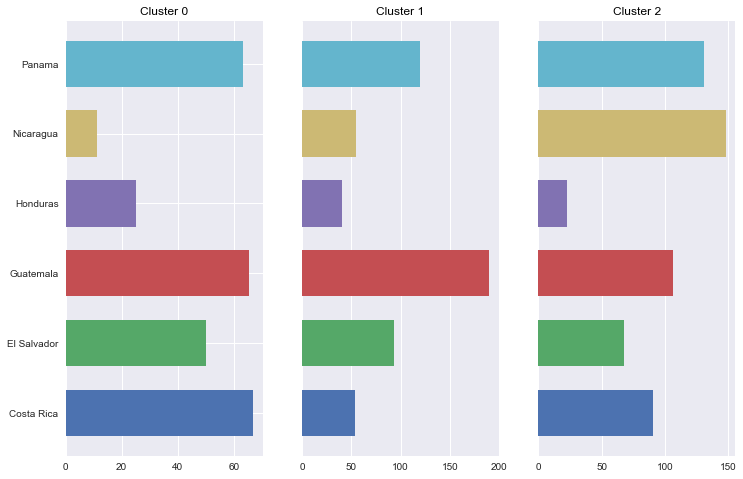

In [65]:
plt.figure(1, figsize = (12, 8))
bar_plot(centros, Importaciones.columns)

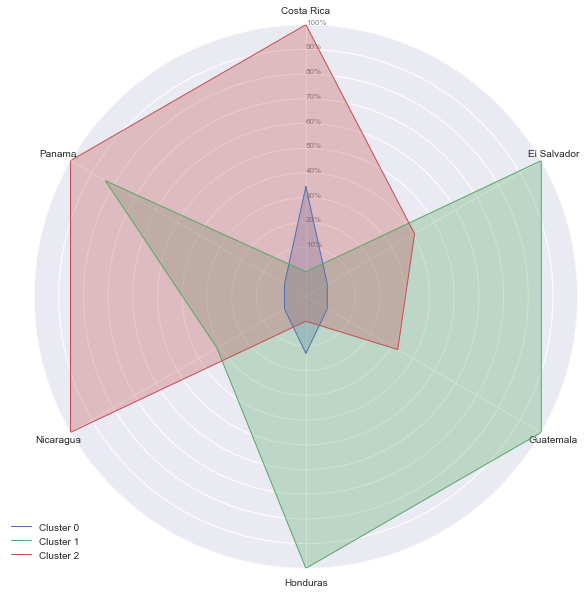

In [66]:
plt.figure(1, figsize = (10, 10))
radar_plot(centros, Importaciones.columns)


In [67]:
clusters = pd.DataFrame({'year' : Importaciones.index, 'cluster': grupos})
print(clusters)


   year  cluster
0  1979        0
1  1980        0
2  1981        2
3  1982        2
4  1983        2
5  1984        1
6  1985        1
7  1986        0
8  1987        0
9  1988        0


 Interpretacion

 ** K medias

In [68]:
kmedias = KMeans(n_clusters=3)
kmedias.fit(Importaciones)
print(kmedias.predict(Importaciones))

[0 0 1 1 1 2 2 0 0 0]


In [69]:
centros = np.array(kmedias.cluster_centers_)
print(centros)

[[ 66.84        50.18        65.44        24.92        11.3
   63.22      ]
 [ 90.86666667  67.83333333 106.5         22.5        147.9
  130.56666667]
 [ 54.2         93.45       190.15        41.05        54.45
  119.6       ]]


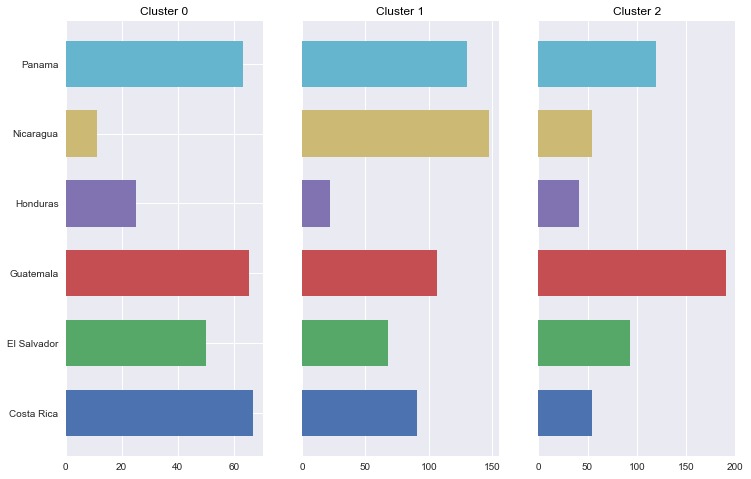

In [70]:
plt.figure(1, figsize = (12, 8))
bar_plot(centros, Importaciones.columns)

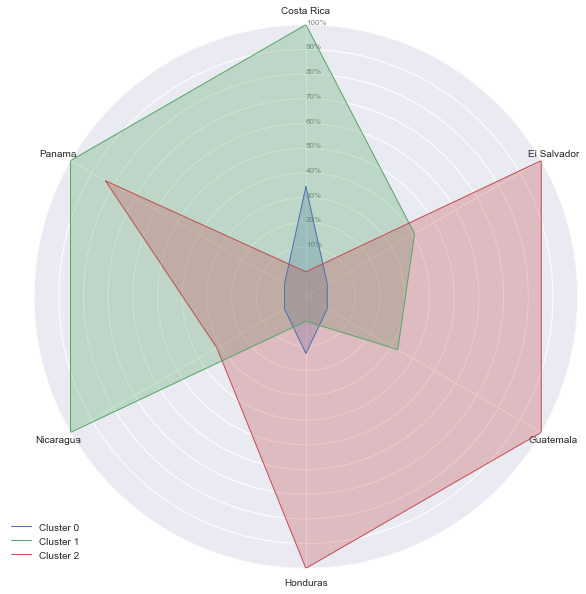

In [71]:
plt.figure(1, figsize = (10, 10))
radar_plot(centros, Importaciones.columns)

In [72]:
Importaciones['Cluster'] = kmedias.predict(Importaciones)
print(Importaciones)
Importaciones.to_csv('ImportacionesMexicoCluster.csv',sep=';',index=False)


      Costa Rica  El Salvador  Guatemala  Honduras  Nicaragua  Panama  Cluster
1979        44.4         27.2       45.6      20.0        6.0    14.1        0
1980        75.5         11.8       58.9      22.6       17.8    14.4        0
1981       110.7         50.6      128.3      17.2      119.4   118.5        1
1982        80.3         70.6      102.2      15.2      154.9   146.1        1
1983        81.6         82.3       89.0      35.1      169.4   127.1        1
1984        76.4         97.4      185.0      51.0       75.5   129.0        2
1985        32.0         89.5      195.3      31.1       33.4   110.2        2
1986        55.5         63.1       66.3      24.4        9.7    66.7        0
1987        74.3         72.6       76.3      28.1       11.2   110.7        0
1988        84.5         76.2       80.1      29.5       11.8   110.2        0


 ## Ejercicio #2

In [73]:
Padecimientos = pd.read_csv('DatosClase\\SAheart.csv', ';')
del Padecimientos['famhist']
del Padecimientos['chd']
print(Padecimientos)



     sbp  tobacco    ldl  adiposity  typea  obesity  alcohol  age
0    160    12.00   5.73      23.11     49    25.30    97.20   52
1    144     0.01   4.41      28.61     55    28.87     2.06   63
2    118     0.08   3.48      32.28     52    29.14     3.81   46
3    170     7.50   6.41      38.03     51    31.99    24.26   58
4    134    13.60   3.50      27.78     60    25.99    57.34   49
5    132     6.20   6.47      36.21     62    30.77    14.14   45
6    142     4.05   3.38      16.20     59    20.81     2.62   38
7    114     4.08   4.59      14.60     62    23.11     6.72   58
8    114     0.00   3.83      19.40     49    24.86     2.49   29
9    132     0.00   5.80      30.96     69    30.11     0.00   53
10   206     6.00   2.95      32.27     72    26.81    56.06   60
11   134    14.10   4.44      22.39     65    23.09     0.00   40
12   118     0.00   1.88      10.05     59    21.57     0.00   17
13   132     0.00   1.87      17.21     49    23.63     0.97   15
14   112  

 b)  Usando solamente las variables num´ericas, ejecute un Clustering Jer´arquico
 con la agregaci´on del Salto M´aximo, Salto M´ınimo, Promedio y Ward.
 Grafique el dendograma con cortes para dos y tres cl´usteres.

In [74]:
ward_res = ward(Padecimientos)         #Ward
single_res = single(Padecimientos)     #Salto mínimo
complete_res = complete(Padecimientos) #Salto Máximo
average_res = average(Padecimientos)   #Promedio

 ** Agregacion promedio

Text(0, 0.5, 'Distancia o Agregación')

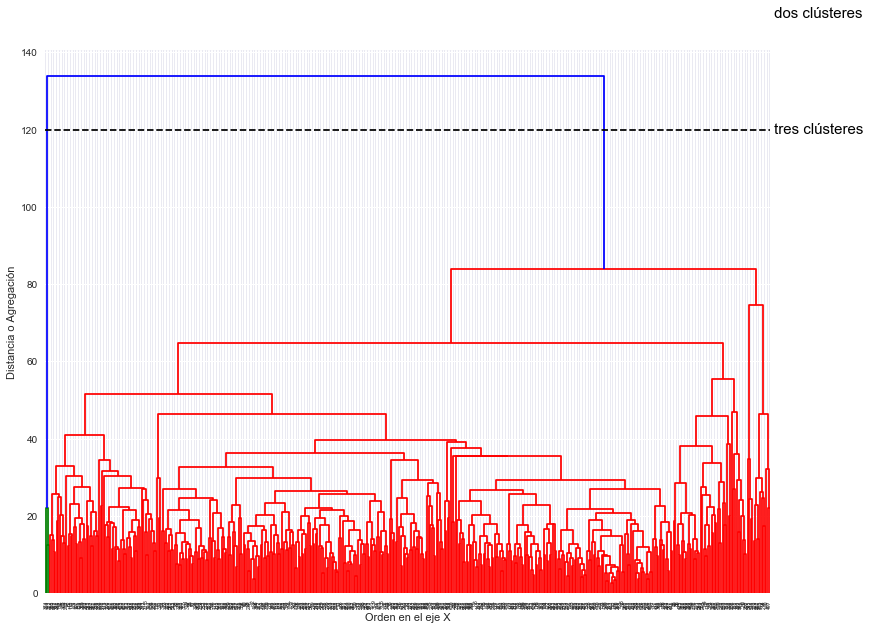

In [75]:
plt.style.use('seaborn')
plt.figure(figsize=(13,10))

dendrogram(average_res,labels= Padecimientos.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [150, 150], '--', c='k')
ax.plot(limites, [120, 120], '--', c='k')
ax.text(limites[1], 150, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 120, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")

 ** Agregacion salto minimo

Text(0, 0.5, 'Distancia o Agregación')

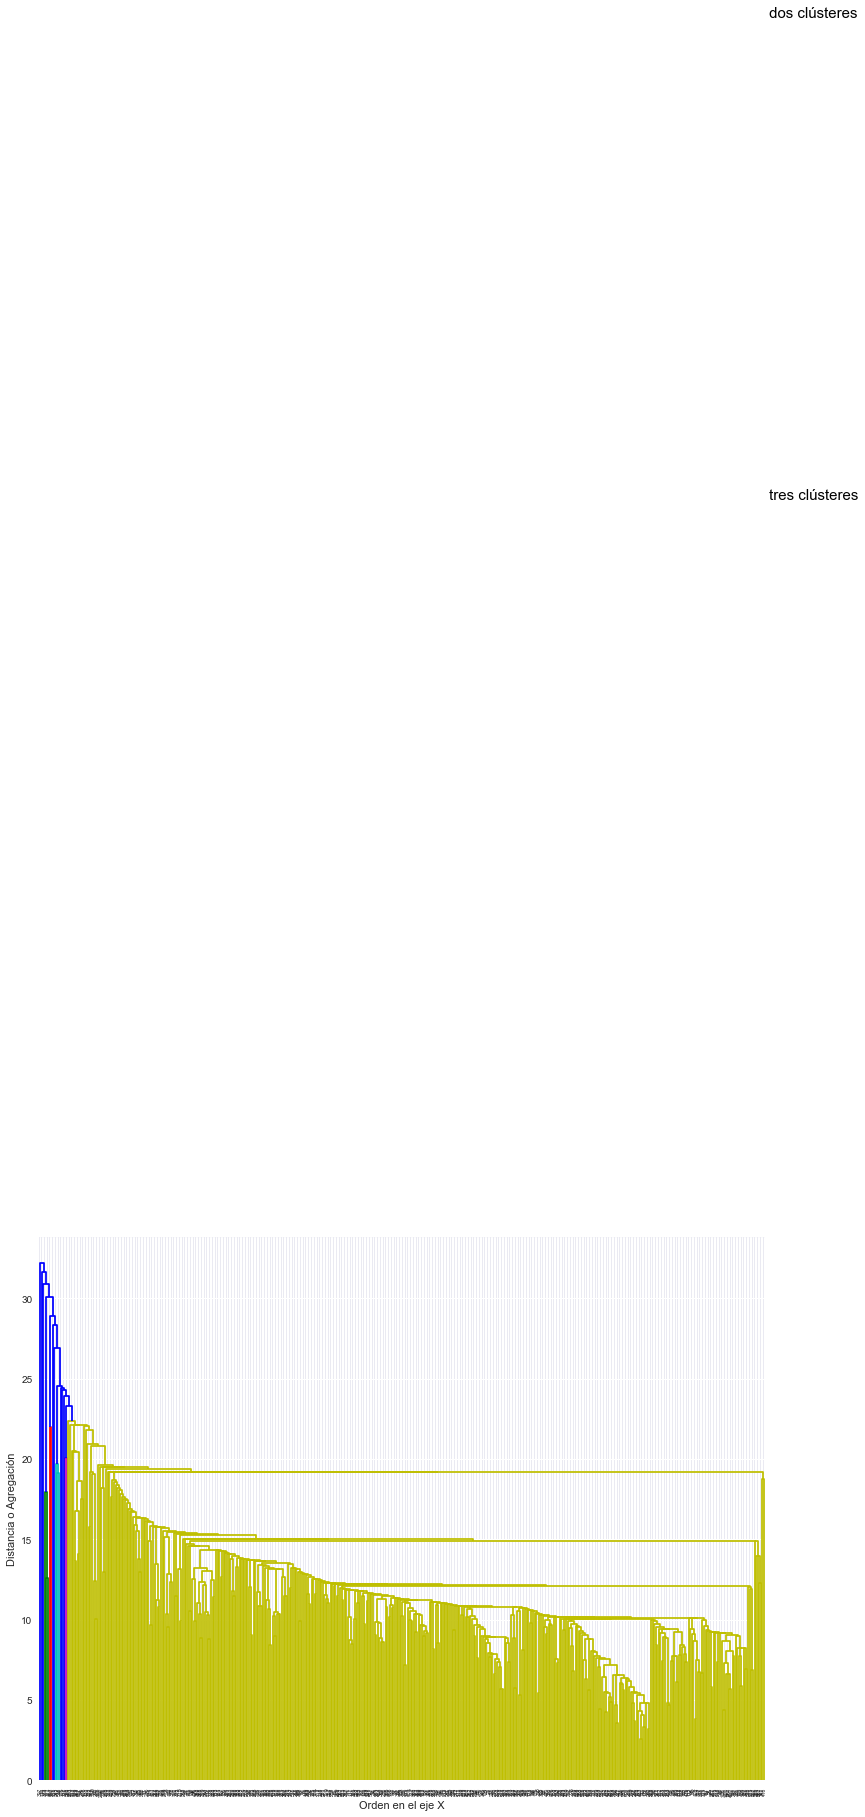

In [76]:
plt.figure(figsize=(13,10))
dendrogram(single_res,labels= Padecimientos.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [110, 110], '--', c='k')
ax.plot(limites, [80, 80], '--', c='k')
ax.text(limites[1], 110, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 80, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")

 ** Agregacion salto maximo

Text(0, 0.5, 'Distancia o Agregación')

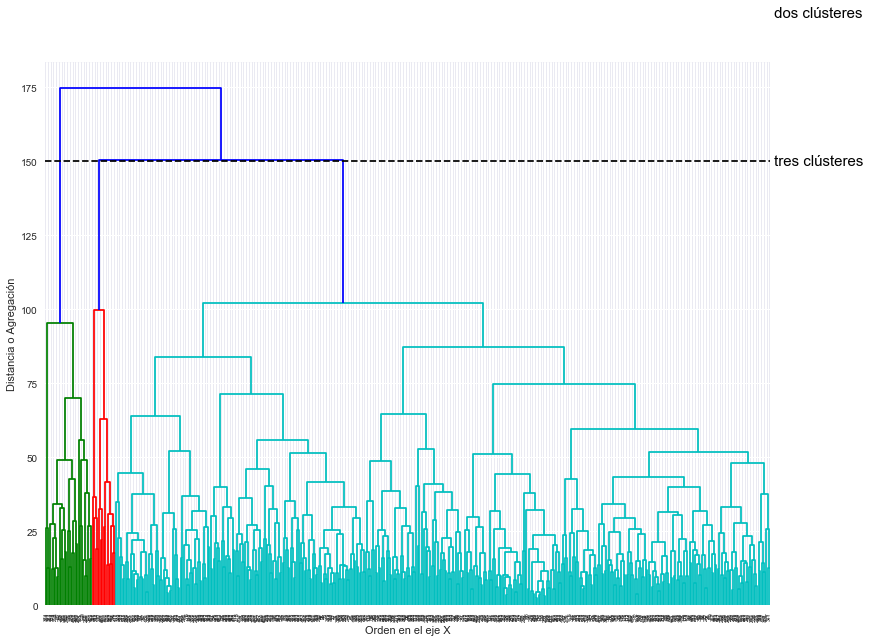

In [77]:
plt.figure(figsize=(13,10))
dendrogram(complete_res,labels= Padecimientos.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [200, 200], '--', c='k')
ax.plot(limites, [150, 150], '--', c='k')
ax.text(limites[1], 200, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 150, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")

 ** Agregacion Ward

Text(0, 0.5, 'Distancia o Agregación')

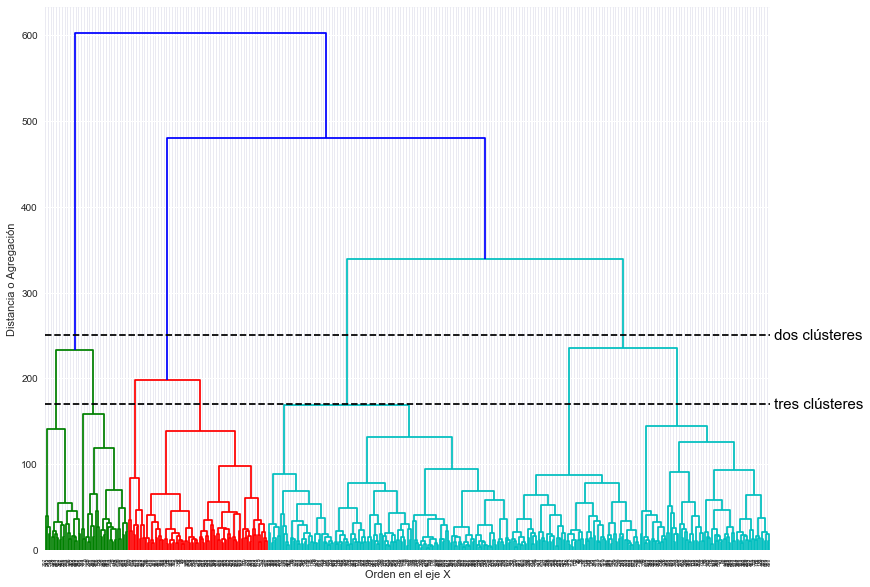

In [78]:
plt.figure(figsize=(13,10))
dendrogram(ward_res,labels= Padecimientos.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [250, 250], '--', c='k')
ax.plot(limites, [170, 170], '--', c='k')
ax.text(limites[1], 250, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 170, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")


 c) Usando 3 cl´usteres interprete los resultados del ejercicio anterior para el caso de agregaci´on
 de Ward mediante gr´aficos de barras y gr´aficos tipo Radar.

In [79]:
grupos = fcluster(linkage(pdist(Padecimientos), method = 'ward', metric='euclidean'), 3, criterion = 'maxclust')
grupos = grupos-1
print(grupos)

[0 1 2 1 0 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2 2 2 1 1 1 2 2 2 1 1 2 1 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 1 1 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 0 2 1 2 2 2
 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 2 0 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 1 2 2 2 0 0 2 0 2 2 2 1 2 2 2 2 2 1 2 1 1 2 2 1 2 2 2 2 2 2 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 1
 2 2 2 2 2 2 2 1 0 2 2 2 0 2 2 1 2 2 2 2 0 1 2 2 2 1 1 2 0 2 1 1 0 0 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 0 1 2 0 2 2 2 2 2 2 2 2 0 2 2
 2 2 0 1 2 2 1 2 2 2 1 2 0 2 1 2 1 1 0 0 2 2 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2
 1 1 0 2 2 2 0 2 2 0 2 2 0 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 0 0 1 2 2 2 2 1
 2 0 2 2 0 2 0 2 0 1 2 0 2 2 0 1 1 1 2 0 2 1 1 1 2 2 1 0 2 2 2 2 1 1 1 2 1
 1 2 2 1 1 1 1 1 2 0 1 2 2 0 1 0 1 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 0 2 2 0 2 1 2 1 1 1 2 2 2]


In [80]:
centros = np.array(pd.concat([centroide(0, Padecimientos, grupos), 
                              centroide(1, Padecimientos, grupos),
                              centroide(2, Padecimientos, grupos)]))
print(centros)


[[148.88679245   5.69396226   4.57754717  28.04        53.90566038
   26.67339623  70.84433962  46.47169811]
 [165.69662921   4.85213483   5.64370787  30.65168539  52.11235955
   28.12191011   8.73426966  54.46067416]
 [128.965625     2.95640625   4.51603125  23.51184375  53.246875
   25.362       10.44503125  38.971875  ]]


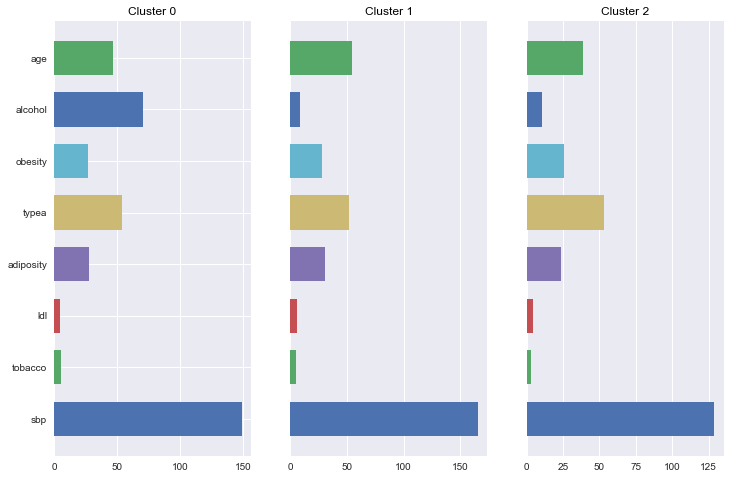

In [81]:
plt.figure(1, figsize = (12, 8))
bar_plot(centros, Padecimientos.columns)

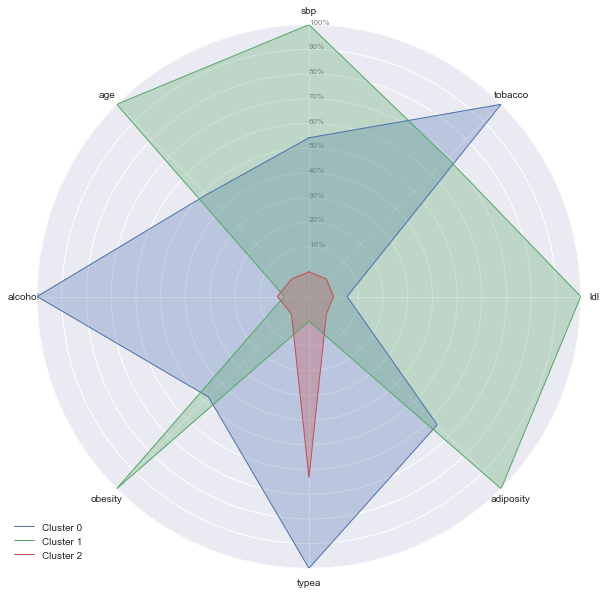

In [82]:
plt.figure(1, figsize = (10, 10))
radar_plot(centros, Padecimientos.columns)


 ## EUsando variables categoricas

In [83]:
Padecimientos = pd.read_csv('DatosClase\\SAheart.csv', ';')
dummies = pd.get_dummies(Padecimientos)
print(dummies)



     sbp  tobacco    ldl  adiposity  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11     49    25.30    97.20   52   
1    144     0.01   4.41      28.61     55    28.87     2.06   63   
2    118     0.08   3.48      32.28     52    29.14     3.81   46   
3    170     7.50   6.41      38.03     51    31.99    24.26   58   
4    134    13.60   3.50      27.78     60    25.99    57.34   49   
5    132     6.20   6.47      36.21     62    30.77    14.14   45   
6    142     4.05   3.38      16.20     59    20.81     2.62   38   
7    114     4.08   4.59      14.60     62    23.11     6.72   58   
8    114     0.00   3.83      19.40     49    24.86     2.49   29   
9    132     0.00   5.80      30.96     69    30.11     0.00   53   
10   206     6.00   2.95      32.27     72    26.81    56.06   60   
11   134    14.10   4.44      22.39     65    23.09     0.00   40   
12   118     0.00   1.88      10.05     59    21.57     0.00   17   
13   132     0.00   1.87      17.2

 b)  Usando solamente las variables num´ericas, ejecute un Clustering Jer´arquico
 con la agregaci´on del Salto M´aximo, Salto M´ınimo, Promedio y Ward.
 Grafique el dendograma con cortes para dos y tres cl´usteres.

In [84]:
ward_res = ward(dummies)         #Ward
single_res = single(dummies)     #Salto mínimo
complete_res = complete(dummies) #Salto Máximo
average_res = average(dummies)   #Promedio

 ** Agregacion promedio

Text(0, 0.5, 'Distancia o Agregación')

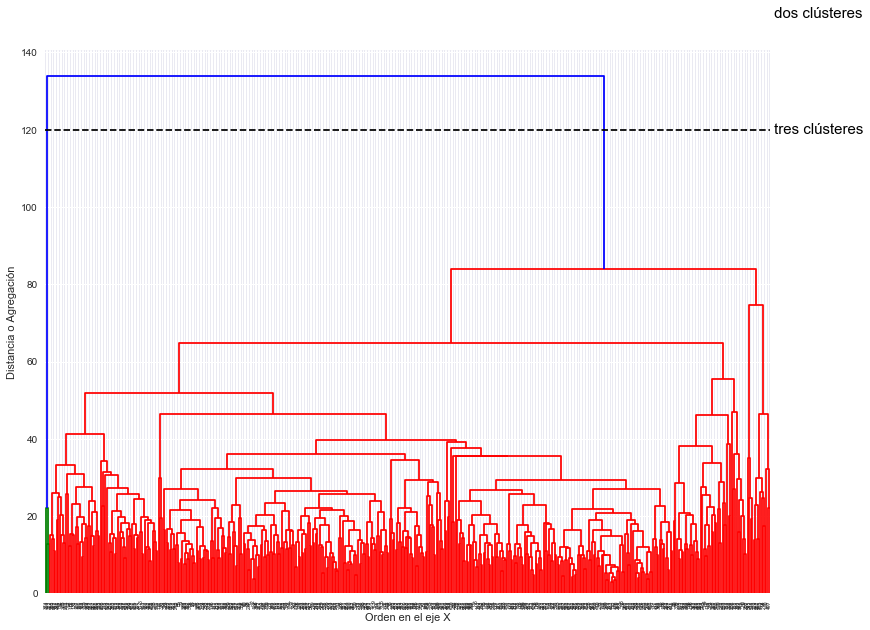

In [85]:
plt.style.use('seaborn')
plt.figure(figsize=(13,10))

dendrogram(average_res,labels= dummies.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [150, 150], '--', c='k')
ax.plot(limites, [120, 120], '--', c='k')
ax.text(limites[1], 150, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 120, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")

 ** Agregacion salto minimo

Text(0, 0.5, 'Distancia o Agregación')

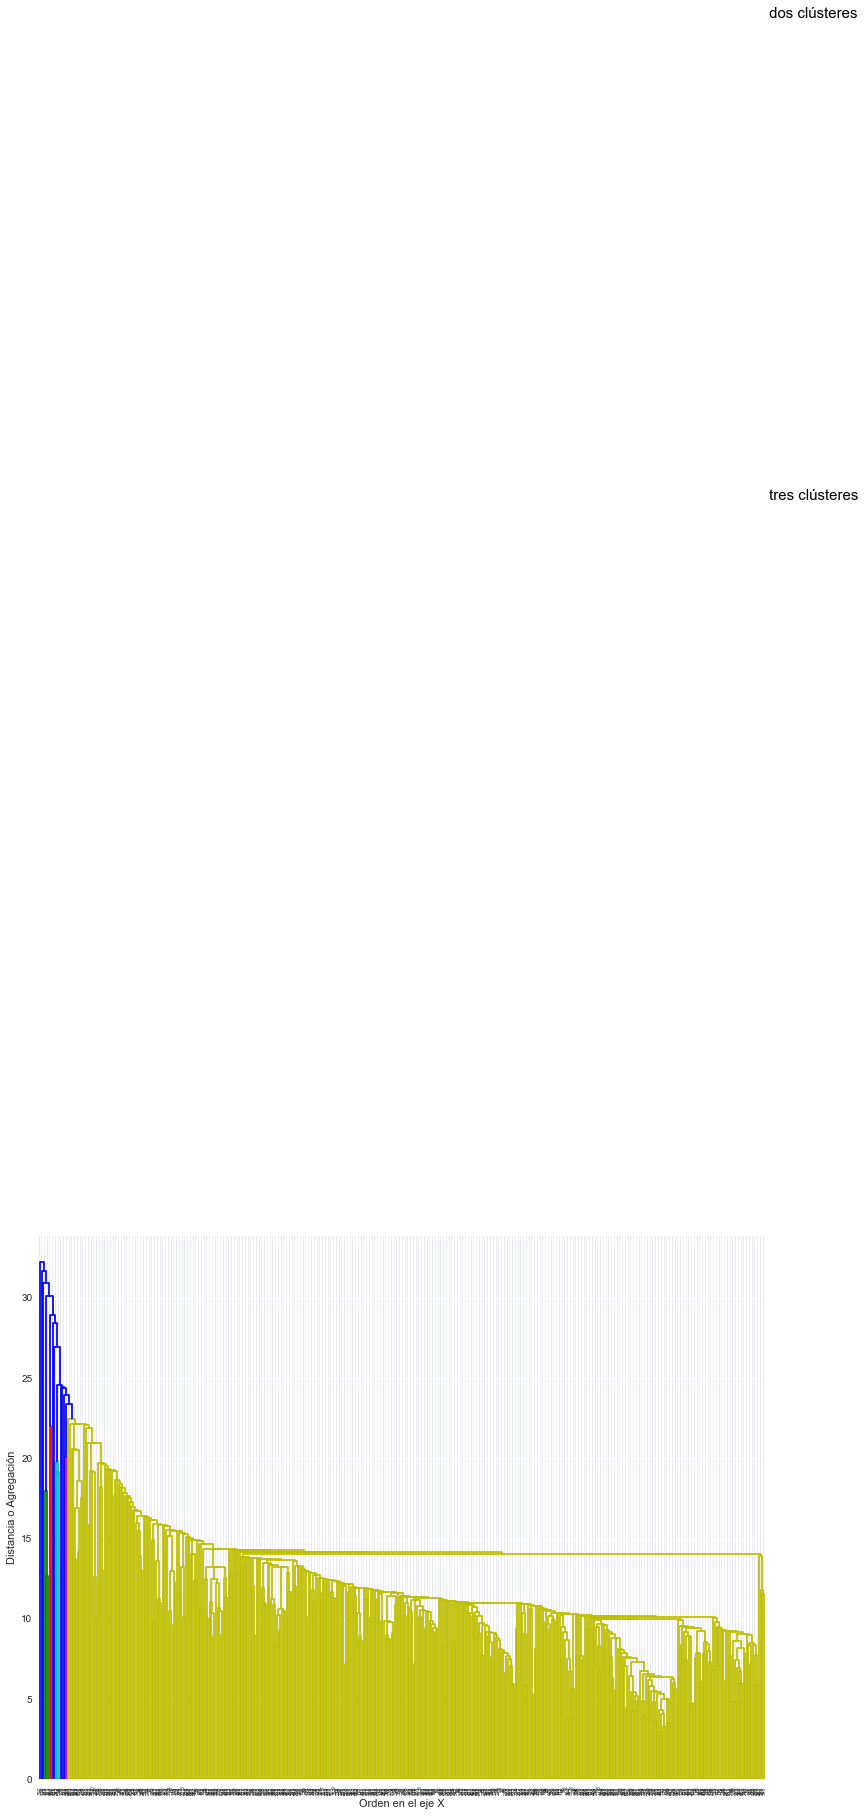

In [86]:
plt.figure(figsize=(13,10))
dendrogram(single_res,labels= dummies.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [110, 110], '--', c='k')
ax.plot(limites, [80, 80], '--', c='k')
ax.text(limites[1], 110, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 80, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")

 ** Agregacion salto maximo

Text(0, 0.5, 'Distancia o Agregación')

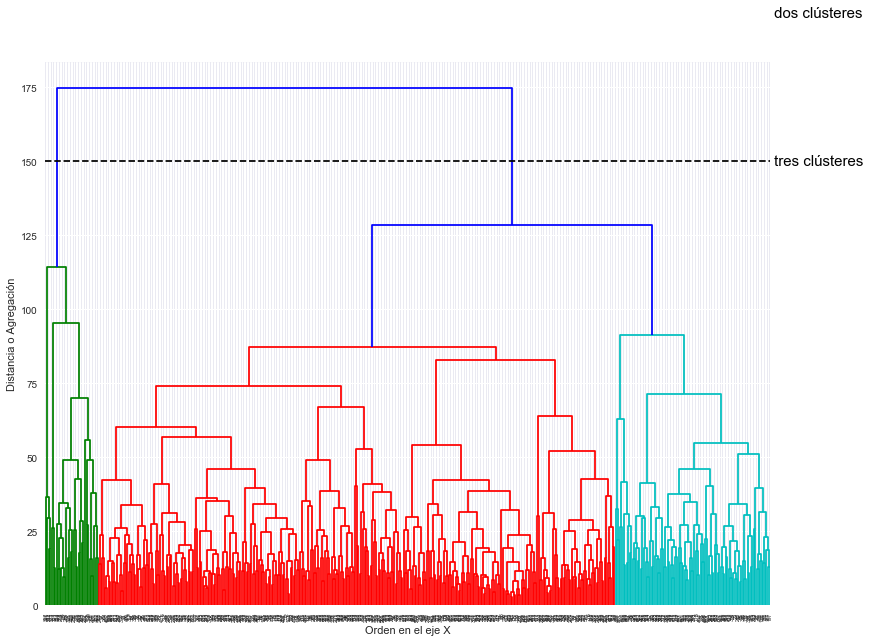

In [87]:
plt.figure(figsize=(13,10))
dendrogram(complete_res,labels= dummies.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [200, 200], '--', c='k')
ax.plot(limites, [150, 150], '--', c='k')
ax.text(limites[1], 200, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 150, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")

 ** Agregacion Ward

Text(0, 0.5, 'Distancia o Agregación')

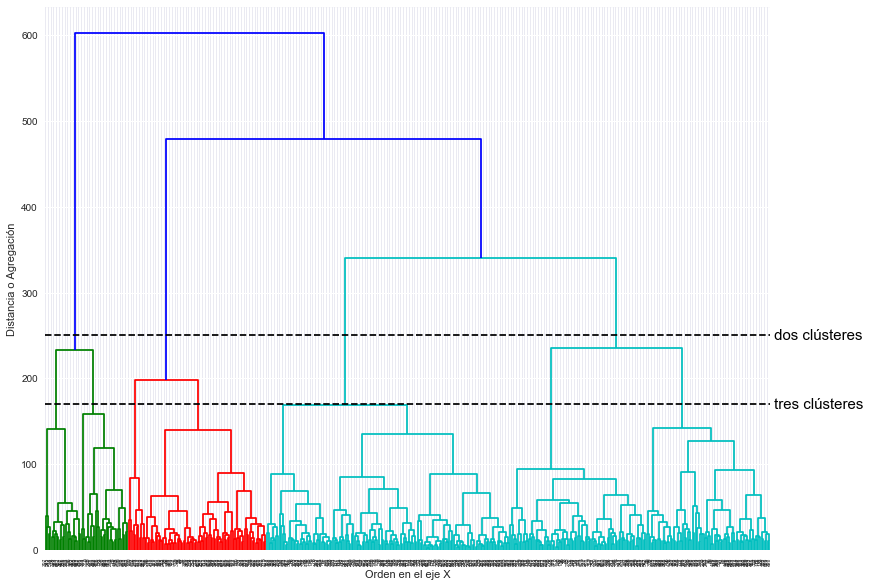

In [88]:
plt.figure(figsize=(13,10))
dendrogram(ward_res,labels= dummies.index.tolist())

ax = plt.gca()
limites = ax.get_xbound()
ax.plot(limites, [250, 250], '--', c='k')
ax.plot(limites, [170, 170], '--', c='k')
ax.text(limites[1], 250, ' dos clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
ax.text(limites[1], 170, ' tres clústeres', va='center', fontdict={'size': 15, 'color': 'black'})
plt.xlabel("Orden en el eje X")
plt.ylabel("Distancia o Agregación")


 c) Usando 3 clusteres interprete los resultados del ejercicio anterior para el caso de agregacion
 de Ward mediante graficos de barras y graficos tipo Radar.

In [89]:
grupos = fcluster(linkage(pdist(dummies), method = 'ward', metric='euclidean'), 3, criterion = 'maxclust')
grupos = grupos-1
print(grupos)

[0 1 2 1 0 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2 2 2 1 1 1 2 2 2 1 1 2 1 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 1 1 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 0 2 1 2 2 2
 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 2 0 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 1 2 2 2 0 0 2 0 2 2 2 1 2 2 2 2 2 1 2 1 1 2 2 1 2 2 2 2 2 2 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 1
 2 2 2 2 2 2 2 1 0 2 2 2 0 2 2 1 2 2 2 2 0 1 2 2 2 1 1 2 0 2 1 1 0 0 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 0 1 2 0 2 2 2 2 2 2 2 2 0 2 2
 2 2 0 1 2 2 1 2 2 2 1 2 0 2 1 2 1 1 0 0 2 2 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2
 2 1 0 2 2 2 0 2 2 0 2 2 0 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 0 0 1 2 2 2 2 1
 2 0 2 2 0 2 0 2 0 1 2 0 2 2 0 1 1 1 2 0 2 1 1 1 2 2 1 0 2 2 2 2 1 1 1 2 1
 1 2 2 1 1 1 1 1 2 0 1 2 2 0 1 0 1 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 0 2 2 0 2 1 2 1 1 1 2 2 2]


In [90]:
centros = np.array(pd.concat([centroide(0, dummies, grupos), 
                              centroide(1, dummies, grupos),
                              centroide(2, dummies, grupos)]))
print(centros)


[[148.88679245   5.69396226   4.57754717  28.04        53.90566038
   26.67339623  70.84433962  46.47169811   0.47169811   0.52830189
    0.66037736   0.33962264]
 [165.85227273   4.68625      5.65988636  30.66125     52.38636364
   28.16931818   8.83352273  54.40909091   0.5          0.5
    0.45454545   0.54545455]
 [129.03738318   3.00778816   4.51510903  23.53146417  53.1682243
   25.35760125  10.41249221  39.03426791   0.62616822   0.37383178
    0.70716511   0.29283489]]


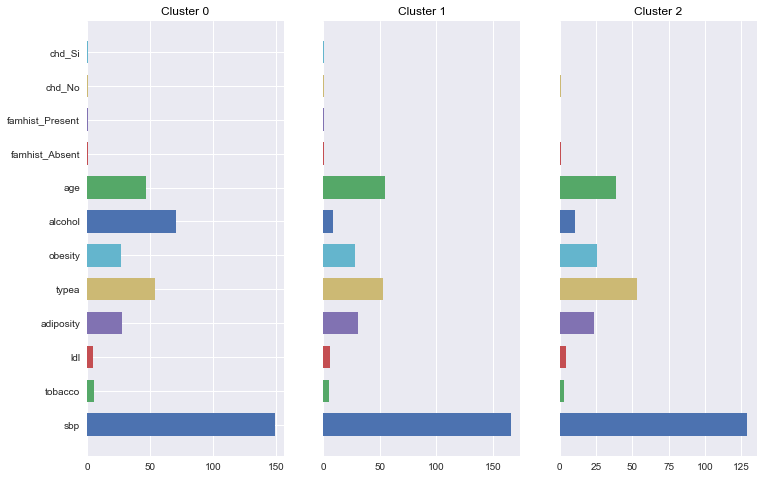

In [91]:
plt.figure(1, figsize = (12, 8))
bar_plot(centros, dummies.columns)

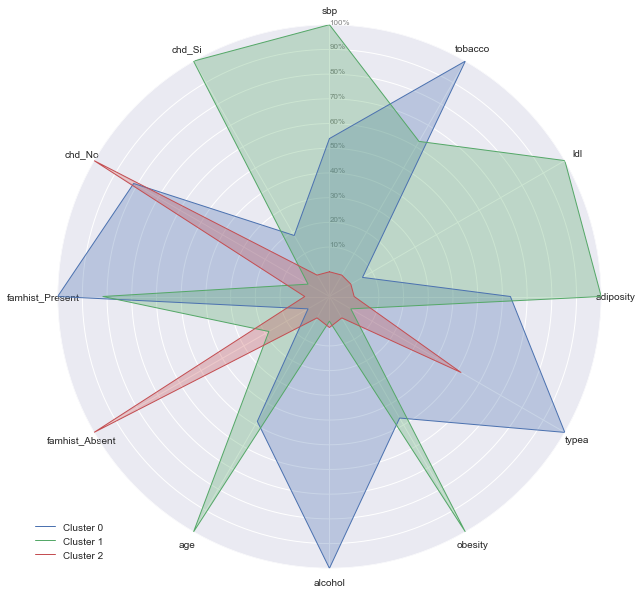

In [92]:
plt.figure(1, figsize = (10, 10))
radar_plot(centros, dummies.columns)


 ## Problema #3
 a) Cargue la tabla de datos y ejecute un dropna().describe(), y encuentre la dimension de
 la tabla de datos (numero de filas y columnas) datos.shape, con esto verifique la correcta
 lectura de los datos

In [93]:
Beijing = pd.read_csv('DatosTarea\\DatosBeijing.csv', ',')

withNa = Beijing.shape[0]
print(withNa)
print(Beijing.describe())
print(Beijing.shape)


43824
                 ID          Anno           Mes           Dia          Hora  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean   21912.500000   2012.000000      6.523549     15.727820     11.500000   
std    12651.043435      1.413842      3.448572      8.799425      6.922266   
min        1.000000   2010.000000      1.000000      1.000000      0.000000   
25%    10956.750000   2011.000000      4.000000      8.000000      5.750000   
50%    21912.500000   2012.000000      7.000000     16.000000     11.500000   
75%    32868.250000   2013.000000     10.000000     23.000000     17.250000   
max    43824.000000   2014.000000     12.000000     31.000000     23.000000   

       ConcetracionParticula_pm2.5    PuntoRocio   Temperatura       Presion  \
count                 41757.000000  43824.000000  43824.000000  43824.000000   
mean                     98.613215      1.817246     12.448521   1016.447654   
std                      92.050387     14.

In [95]:
Beijing = Beijing.dropna()
noNa = Beijing.shape[0]
print("Se eliminaron " + str(withNa - noNa) + " filas")


Se eliminaron 2067 filas


 c) Elimine de la tabla de datos la variable DireccionViento. ¿Por que se debe eliminar?
 ¿Que otra alternativa se tiene en lugar de eliminarla?

In [96]:
del Beijing['DireccionViento']
print(Beijing)

          ID  Anno  Mes  Dia  Hora  ConcetracionParticula_pm2.5  PuntoRocio  \
24        25  2010    1    2     0                        129.0         -16   
25        26  2010    1    2     1                        148.0         -15   
26        27  2010    1    2     2                        159.0         -11   
27        28  2010    1    2     3                        181.0          -7   
28        29  2010    1    2     4                        138.0          -7   
29        30  2010    1    2     5                        109.0          -7   
30        31  2010    1    2     6                        105.0          -7   
31        32  2010    1    2     7                        124.0          -7   
32        33  2010    1    2     8                        120.0          -8   
33        34  2010    1    2     9                        132.0          -7   
34        35  2010    1    2    10                        140.0          -7   
35        36  2010    1    2    11                  

 Se elimina esta variable por ser una variable categorica.
 Existe la opcion de convertirla en variable dummy para ser utilizada como nuemrica

 d) ¿Que pasa si ejecutamos un clustering jerarquico para esta tabla de datos. ¿Por que sucede
 esto?

In [97]:
#grupos = fcluster(linkage(pdist(Beijing), method = 'ward', metric='euclidean'), 3, criterion = 'maxclust')

 Al tener una compudatora de baja capacidad, este algoritmo es muy pesado, pues tiene que manejar un array de n x n, donde
 n = 43 000, por tanto, no es viable ejecutarlo.
 Aun asi, como prueba se ejcuto y hubo que reiniciar la computadora de manera forzada,
 pues ni siquiera la interrupcion del mouse al procesador estaba siendo ejecutada.

 Investigue y explique para que sirven los atributos max iter (similar a iter.max en R)
 y n init (similar a nstart en R), ambos de la clase sklearn.cluster.KMeans. Luego
 ejecute un k-medias con k = 3 usando max iter=5000 y n init=10.

In [98]:
del Beijing['ID']
#del Beijing['Anno']
del Beijing['Hora']
del Beijing['Dia']
del Beijing['Mes']

Beijing['Anno'] = Beijing['Anno'].astype(str)

dummies = pd.get_dummies(Beijing)

kmedias = KMeans(n_clusters=3, max_iter=5000, n_init=10)
kmedias.fit(dummies)
print(kmedias.predict(dummies))

[1 1 0 ... 2 2 2]


In [99]:
centros = np.array(kmedias.cluster_centers_)
print(centros)

[[ 2.45693774e+02  4.41167471e+00  9.89855243e+00  1.01627357e+03
   8.13637872e+00  6.77886313e-02  6.83770743e-02  2.15134753e-01
   2.00894433e-01  1.77356714e-01  2.13369425e-01  1.93244675e-01]
 [ 6.43254943e+01  2.37598124e+00  1.37869125e+01  1.01584663e+03
   1.47469763e+01  5.30927331e-02  2.31327970e-01  1.81492460e-01
   1.86899450e-01  2.04521025e-01  2.10253738e-01  2.16833328e-01]
 [ 2.16002345e+01 -1.45951544e+01  4.09222352e+00  1.02415866e+03
   1.85510762e+02  4.10316530e-02  1.77413052e-01  2.70027354e-01
   2.29386479e-01  1.98905823e-01  1.60218835e-01  1.41461508e-01]]


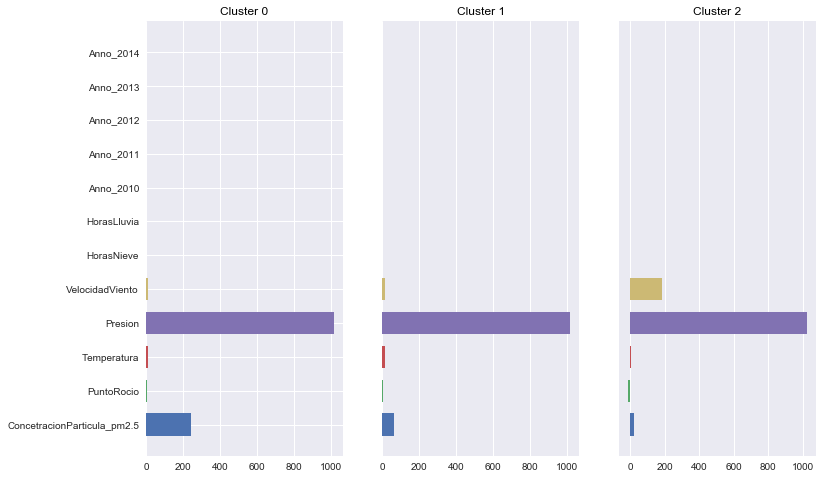

In [100]:
plt.figure(1, figsize = (12, 8))
bar_plot(centros, dummies.columns)

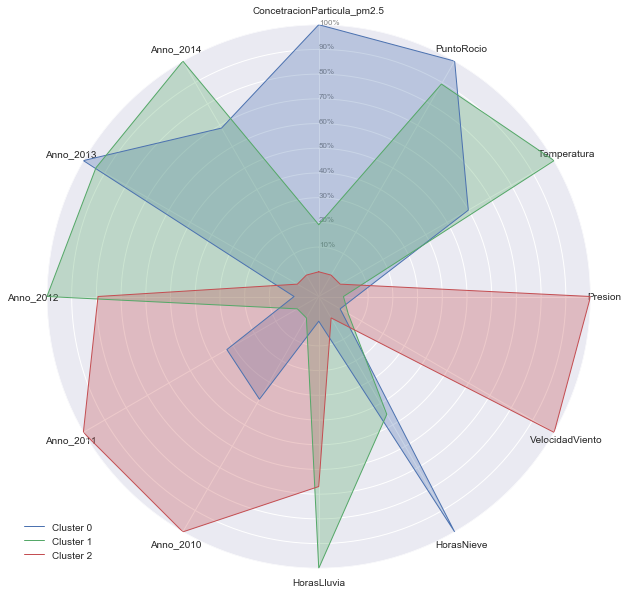

In [101]:
plt.figure(1, figsize = (10, 10))
radar_plot(centros, dummies.columns)


 ## Ejercicio # 4

In [102]:
class Exploratorio():
    def __init__(self, dataframe = pd.DataFrame()):
        self.__dataframe = dataframe
    
    @property
    def dataframe(self):
        return self.__dataframe
    
    @dataframe.setter
    def dataframe(self, nuevo_dataframe):
        self.dataframe = nuevo_dataframe
    
    def analisis(self, var):
        print("Encabezado \n")
        print(self.__encabezado())
        print("\nDimension\n")
        print(self.__dimension())
        print("\nMedia\n")
        print(self.__estadisticas()['Media'])
        print("\nMediana\n")
        print(self.__estadisticas()['Mediana'])
        print("\nDesviación Estandar\n")
        print(self.__estadisticas()['DS'])
        print("\nMínimo\n")
        print(self.__estadisticas()['minimo'])
        print("\nPercentiles\n")
        print(self.__percentiles())
        print("\nMáximo\n")
        print(self.__estadisticas()['maximo'])
        print("\nBoxplot\n")
        box = self.__boxplot()

    def __encabezado(self):
        return self.dataframe.head()
    
    def __dimension(self):
        return self.dataframe.shape
        
    def __estadisticas(self):
        return {'Media' : self.dataframe.mean(numeric_only=True),
                'Mediana' : self.dataframe.median(numeric_only=True),
                'DS' : self.dataframe.std(numeric_only=True),
                'minimo' : self.dataframe.min(numeric_only=True),
                'maximo' : self.dataframe.max(numeric_only=True)}
    
    def __percentiles(self):
        return self.dataframe.quantile(np.array([0,.25,.50,.75,1]))

    def __boxplot(self):
        return self.dataframe.boxplot(return_type='axes')
    
    def __dist_densidad(self, var):
        return self.dataframe[var].plot(kind='density')
    
    def __histograma(self, var):
        return self.dataframe[var].plot(kind='hist')
    
    def __test_normalidad(self, var):
        return scipy.stats.shapiro(self.dataframe.dropna()[var])

Encabezado 

  Unnamed: 0  Matematicas  Ciencias  Espanol  Historia  EdFisica
0      Lucia          7.0       6.5      9.2       8.6       8.0
1      Pedro          7.5       9.4      7.3       7.0       7.0
2       Ines          7.6       9.2      8.0       8.0       7.5
3       Luis          5.0       6.5      6.5       7.0       9.0
4     Andres          6.0       6.0      7.8       8.9       7.3

Dimension

(10, 6)

Media

Matematicas    6.79
Ciencias       7.65
Espanol        7.74
Historia       7.90
EdFisica       7.42
dtype: float64

Mediana

Matematicas    6.90
Ciencias       6.85
Espanol        7.75
Historia       8.00
EdFisica       7.25
dtype: float64

Desviación Estandar

Matematicas    0.951548
Ciencias       1.609865
Espanol        0.860491
Historia       1.121507
EdFisica       0.928320
dtype: float64

Mínimo

Matematicas    5.0
Ciencias       6.0
Espanol        6.5
Historia       5.5
EdFisica       6.0
dtype: float64

Percentiles

      Matematicas  Ciencias  Espanol  H

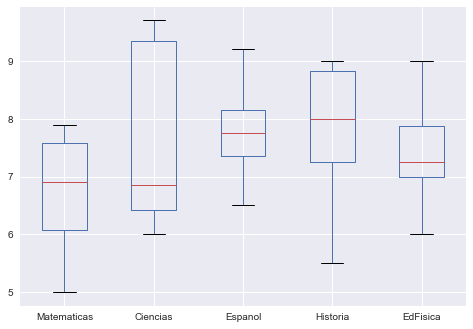

In [103]:
Estudiantes = pd.read_csv('DatosClase\\EjemploEstudiantes.csv', ';', decimal=',')
Exp = Exploratorio(Estudiantes)

var = ['Matematicas', 'Ciencias']

Exp.analisis(var)